In [6]:
import torch
!pip install timm
midas = torch.hub.load("intel-isl/MiDaS", "MiDaS")
midas.eval()

Defaulting to user installation because normal site-packages is not writeable
Loading weights:  None
Using cache found in C:\Users\Tanishq/.cache\torch\hub\intel-isl_MiDaS_master
You should consider upgrading via the 'c:\program files\python39\python.exe -m pip install --upgrade pip' command.
Using cache found in C:\Users\Tanishq/.cache\torch\hub\facebookresearch_WSL-Images_master


ng_stats=True)
        (relu): ReLU(inplace=True)
      )
    )
    (layer3): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(512, 1024, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(1024, 1024, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), groups=32, bias=False)
        (bn2): BatchNorm2d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(1024, 1024, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
          (0): Conv2d(512, 1024, kernel_size=(1, 1), stride=(2, 2), bias=False)
          (1): BatchNorm2d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        )
      )
      (1): Bottleneck(
        (conv1): Conv2d(1024, 1024

In [7]:
import cv2
import torch
import urllib.request

import matplotlib.pyplot as plt

url, filename = ("https://github.com/pytorch/hub/raw/master/images/dog.jpg", "dog.jpg")
urllib.request.urlretrieve(url, filename)


('dog.jpg', <http.client.HTTPMessage at 0x25e54d45730>)

In [8]:
use_large_model = True

if use_large_model:
    midas = torch.hub.load("intel-isl/MiDaS", "MiDaS")
else:
    midas = torch.hub.load("intel-isl/MiDaS", "MiDaS_small")

Using cache found in C:\Users\Tanishq/.cache\torch\hub\intel-isl_MiDaS_master
Using cache found in C:\Users\Tanishq/.cache\torch\hub\facebookresearch_WSL-Images_master
Loading weights:  None


In [9]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
midas.to(device)
midas.eval()

ng_stats=True)
        (relu): ReLU(inplace=True)
      )
    )
    (layer3): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(512, 1024, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(1024, 1024, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), groups=32, bias=False)
        (bn2): BatchNorm2d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(1024, 1024, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
          (0): Conv2d(512, 1024, kernel_size=(1, 1), stride=(2, 2), bias=False)
          (1): BatchNorm2d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        )
      )
      (1): Bottleneck(
        (conv1): Conv2d(1024, 1024

In [10]:
midas_transforms = torch.hub.load("intel-isl/MiDaS", "transforms")

if use_large_model:
    transform = midas_transforms.default_transform
else:
    transform = midas_transforms.small_transform

Using cache found in C:\Users\Tanishq/.cache\torch\hub\intel-isl_MiDaS_master


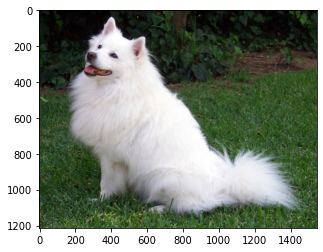

In [11]:
img = cv2.imread(filename)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

input_batch = transform(img).to(device)

In [12]:
with torch.no_grad():
    prediction = midas(input_batch)

    prediction = torch.nn.functional.interpolate(
        prediction.unsqueeze(1),
        size=img.shape[:2],
        mode="bicubic",
        align_corners=False,
    ).squeeze()
    
output = prediction.cpu().numpy()

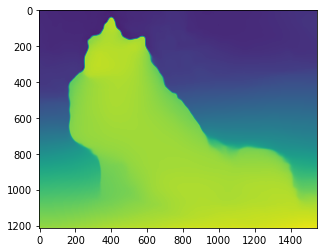

In [13]:
plt.imshow(output)
plt.imsave('image_new.jpg',output )

# plt.show()

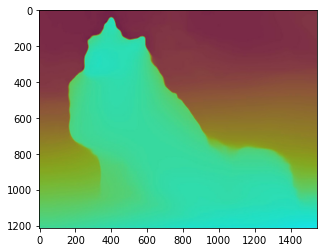

In [14]:
import cv2


img = cv2.imread("image_new.jpg")
b,g,r=cv2.split(img)
#plt.imshow(img)

img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
plt.imshow(img)



mask1 = cv2.inRange(img_hsv, (0,50,20), (5,255,255))
mask2 = cv2.inRange(img_hsv, (175,50,20), (180,255,255))

mask = cv2.bitwise_or(mask1, mask2 )
croped = cv2.bitwise_and(img, img, mask=mask)

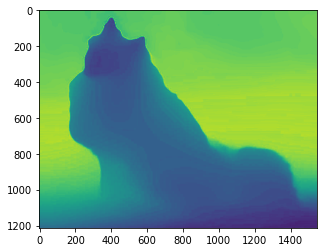

In [15]:
plt.imshow(b)



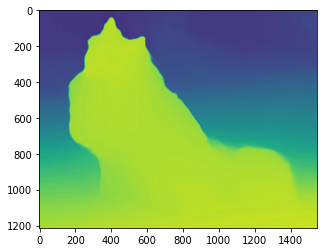

In [16]:
plt.imshow(g)


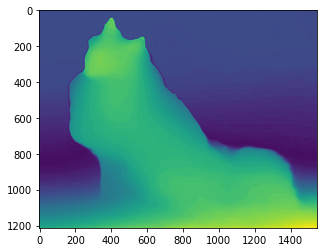

In [17]:
plt.imshow(r)

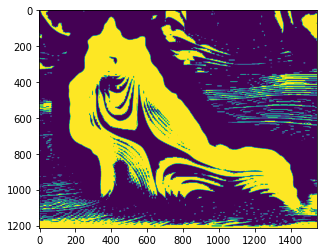

In [18]:
src = cv2.imread('image_new.jpg',0)
thresh1 = cv2.adaptiveThreshold(src, 255, cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY, 199, 0)
plt.imshow(thresh1)

In [19]:
height, width = thresh1.shape[:2]
print(thresh1.shape)

(1213, 1546)


0 606
0 1546


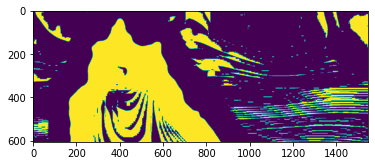

In [20]:
# Let's get the starting pixel coordiantes (top left of cropped top)
start_row, start_col = int(0), int(0)
# Let's get the ending pixel coordinates (bottom right of cropped top)
end_row, end_col = int(height * .5), int(width)
cropped_top = thresh1[start_row:end_row , start_col:end_col]
print (start_row, end_row )
print (start_col, end_col)

plt.imshow(cropped_top) 




606 1213
0 1546


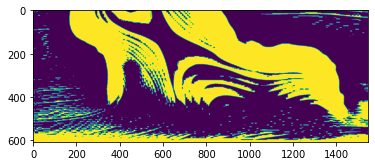

In [21]:
# Let's get the starting pixel coordiantes (top left of cropped bottom)
start_row, start_col = int(height * .5), int(0)
# Let's get the ending pixel coordinates (bottom right of cropped bottom)
end_row, end_col = int(height), int(width)
cropped_bot = thresh1[start_row:end_row , start_col:end_col]
print (start_row, end_row) 
print (start_col, end_col)

plt.imshow(cropped_bot) 


In [22]:
import numpy as np

topnumber_of_white_pix = np.sum(cropped_top == 255)      # extracting only white pixels 

topnumber_of_black_pix = np.sum(cropped_top == 0)          # extracting only black pixels 

print(topnumber_of_white_pix)
print(topnumber_of_black_pix)

288351
648525


In [23]:
import numpy as np

botnumber_of_white_pix = np.sum(cropped_bot == 255)      # extracting only white pixels 

botnumber_of_black_pix = np.sum(cropped_bot == 0)          # extracting only black pixels 

print(botnumber_of_white_pix)
print(botnumber_of_black_pix)

365154
573268


In [24]:
up_or_down = cropped_top
if (topnumber_of_black_pix>=botnumber_of_black_pix):
    
    top_bot_direction = 'UP'
    

    
if (topnumber_of_black_pix<botnumber_of_black_pix):
    
    top_bot_direction = 'DOWN'
    up_or_down=cropped_bot
        
    

print(top_bot_direction)


height, width = up_or_down.shape[:2]
print(up_or_down.shape)


UP
(606, 1546)


0 606
0 773


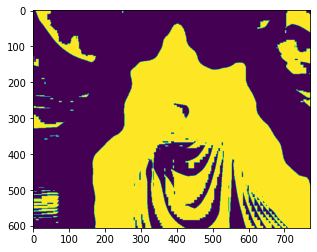

In [25]:
# Let's get the starting pixel coordiantes (top left of cropped top)
start_row, start_col = int(0), int(0)
# Let's get the ending pixel coordinates (bottom right of cropped top)
end_row, end_col = int(height ), int(width/2)
cropped_left = up_or_down[start_row:end_row , start_col:end_col]
print (start_row, end_row )
print (start_col, end_col)

plt.imshow(cropped_left) 




0 606
773 1546


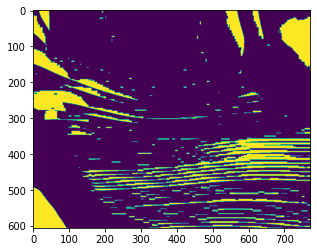

In [26]:
# Let's get the starting pixel coordiantes (top left of cropped top)
start_row, start_col = int(0), int(width/2)
# Let's get the ending pixel coordinates (bottom right of cropped top)
end_row, end_col = int(height ), int(width)
cropped_right = up_or_down[start_row:end_row , start_col:end_col]
print (start_row, end_row )
print (start_col, end_col)

plt.imshow(cropped_right) 


In [27]:
leftnumber_of_white_pix = np.sum(cropped_left == 255)      # extracting only white pixels 

rightnumber_of_black_pix = np.sum(cropped_right == 0)          # extracting only black pixels 

print(leftnumber_of_white_pix)
print(rightnumber_of_black_pix)

212848
392935


In [28]:

if (leftnumber_of_white_pix>=rightnumber_of_black_pix):
    
    left_right_direction = ' LEFT'
    

    
if (leftnumber_of_white_pix<rightnumber_of_black_pix):
    
    left_right_direction = ' RIGHT'
    
        
    

print("Move "+top_bot_direction+" and"+left_right_direction)


Move UP and RIGHT
